##### Author: Jimin Kim (jk55@uw.edu)
##### Version 1.5.0

# Lab 2 Report

### Group Members: Gokul Gopakumar, Ewan Lister

In [2]:
import numpy as np
import soundfile as sf
from scipy.io import wavfile as wav
import simpleaudio as sa


# Exercise 1: Loops vs Numpy operations

<img src="lab2_exercise1.png" width="1000">

In [3]:
import time # Import time to measure computational efficiency of the code

In [4]:
arr2d_1 = np.random.randn(1000, 1000) * 10
arr2d_2 = np.random.randn(1000, 1000) * 10

In [5]:
# Elementwise addition using loop

arr2d_3_loop = np.zeros((1000, 1000)) # Create a placeholder array for arr2d_3

start_time_loop = time.time() # start time of the code

# YOUR CODE HERE FOR ELEMENTWISE ADDITION USING TWO NESTED LOOPS
for i in range(0, 1000):
    for j in range(0,1000):
        arr2d_3_loop[i][j] = arr2d_1[i][j] + arr2d_2[i][j]

end_time_loop = time.time() # end time of the code

elapsed_time_loop = end_time_loop - start_time_loop # end time - start time -> elapsed time in seconds
print(elapsed_time_loop)

0.7550671100616455


In [6]:
# Elementwise addition using Numpy function

start_time_np = time.time()

arr2d_3_np = np.add(arr2d_1, arr2d_2)

end_time_np = time.time()

elapsed_time_np = end_time_np - start_time_np
print(elapsed_time_np)

0.004040241241455078


In [7]:
# Make sure two outputs are equivalent

np.sum(arr2d_3_loop == arr2d_3_np) == 1000 * 1000 # Should output True if the outputs are same

True

### Which computation is faster and by what factor?

The NumPy is faster by a factor of 200. 0.753 / 0.003 ~= 200

### e.g. a code that takes 0.1s is faster by a factor of 10 compared to a code that takes 1s

# Exercise 2: Generate Triangular Waveform

<img src="lab2_exercise2.png" width="1000">

Text(0.5, 0, 'Time')

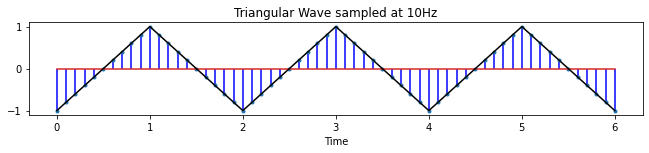

In [8]:
# Your code here
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav
from scipy import signal

# Define plot size to make more similar to specification.
plt.rcParams["figure.figsize"]=(11,1.7)

# X axis, divided into increments of 0.1 between 0 and 6
# representing 10Hz sampling.
t = np.linspace(0, 6, 61, endpoint = True)
triangle_wave = signal.sawtooth(np.pi * t, 0.5) # generate tri wave

# Plot triangle wave against time axis.
plt.stem(t, triangle_wave, linefmt='b-', markerfmt='.')
plt.plot(t, triangle_wave, '-k')
plt.title('Triangular Wave sampled at 10Hz')
plt.xlabel('Time')
#plt.grid()


# Exercise 3: Sinusoidal Generator

<img src="lab2_exercise3.png" width="1000">

In [9]:
# Define generate_sine function
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav
from scipy import signal

# function accepts t_duration as time duration of signal in seconds,
# f0 as wave frequency in Hertz, and fs as sampling frequency in Hz.
# returns a time axis t_arr and an array of amplitudes approximate
# to a unit sin function at frequency f0.
def generate_sine(t_duration, f0, fs):
    
    # YOUR CODE HERE
    # Generating x axis with samples every fs
    # that is t_duration long
    t_arr = np.linspace(0, t_duration, t_duration * fs, endpoint=True)
    amplitudes = np.sin(np.pi * f0 * t_arr) # generate sin wave with 2pi * fs angular frequency

    # Return 1D numpy arrays each containing timepoints and sine waveform amplitudes
    return t_arr, amplitudes 


In [10]:
# parameter set 1
t_duration_1 = 5
f0_1 = 0.5
fs_1 = 100
t_arr_1, amplitudes_1 = generate_sine(t_duration_1, f0_1, fs_1)

# parameter set 2
t_duration_2 = 5
f0_2 = 1.
fs_2 = 100
t_arr_2, amplitudes_2 = generate_sine(t_duration_2, f0_2, fs_2)

# parameter set 3
t_duration_3 = 5
f0_3 = 1.5
fs_3 = 100
t_arr_3, amplitudes_3 = generate_sine(t_duration_3, f0_3, fs_3)

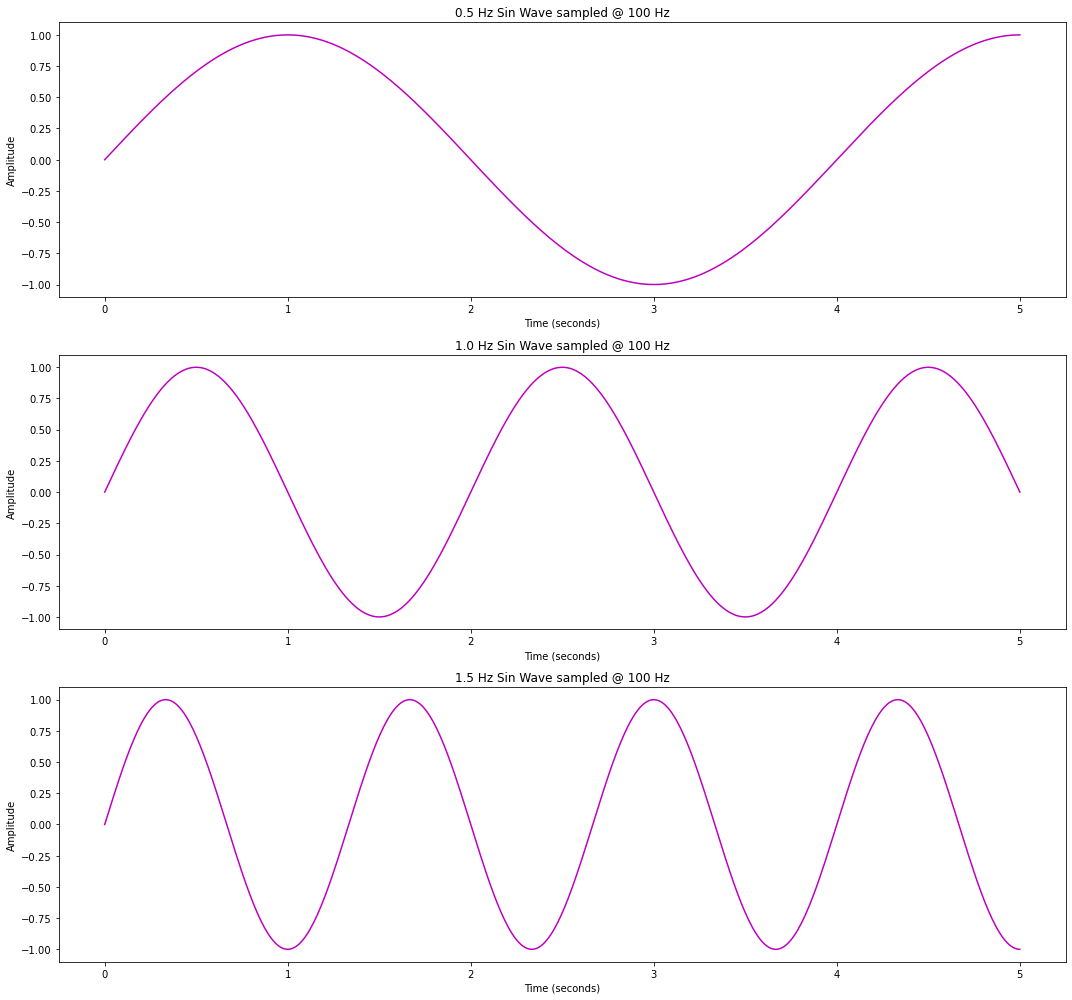

In [11]:
# Plot 3 x 1 subplot showing all three waveform

# Setting plot size to more reasonable window.
plt.rcParams["figure.figsize"]=(15,14)

# First graph
plt.subplot(3, 1, 1)
plt.plot(t_arr_1, amplitudes_1, '-m')
plt.title(str(f0_1) + ' Hz Sin Wave sampled @ ' + str(fs_1) + ' Hz')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')

# Second graph
plt.subplot(3, 1, 2)
plt.plot(t_arr_2, amplitudes_2, '-m')
plt.title(str(f0_2) + ' Hz Sin Wave sampled @ ' + str(fs_2) + ' Hz')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')

# Third graph
plt.subplot(3, 1, 3)
plt.plot(t_arr_3, amplitudes_3, '-m')
plt.title(str(f0_3) + ' Hz Sin Wave sampled @ ' + str(fs_3) + ' Hz')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.tight_layout()


# Exercise 4: Notes Synthesis

<img src="lab2_exercise4.png" width="1000">

In [13]:
# YOUR CODE HERE

# Synthesize 8 notes part of the A major scale, (drawn from a 12 note scale)
# construct an array which can contain all 12 notes in the a major scale.

# array is note amount by note sample length.
sample_rate = 8000
fundamental_freq = 220 # base pitch of A
note_length = 1 # notes are one second
sample_length = note_length * sample_rate
multiplier = 0 # operates on base note to produce harmonics
notes = np.zeros((36, sample_length)) # array to contain 3 chromatic octaves of notes

# Loop initializes each index in notes as a musical note starting with A = 220Hz
for i in range(36):
    multiplier = 2**(i/12)
    time_axis, new_note = generate_sine(note_length, fundamental_freq * multiplier, sample_rate)
    notes[i] = notes[i] + new_note

# Constructing an A major scale starting at A = 440
a_maj_scale = np.concatenate((notes[12], notes[14], notes[16], notes[17], notes[19], 
                              notes[21], notes[23], notes[24]))

# Amplifying to speaker volume
a_maj_scale = 32767 * a_maj_scale

a_maj_name = 'amajscale.wav'

# writing audio
wav.write(a_maj_name, sample_rate, a_maj_scale.astype('int16'))

# reading audio
fsa, a_scale_audio = wav.read(a_maj_name)

# playing audio
player1 = sa.play_buffer(a_scale_audio, num_channels = 1, bytes_per_sample = 2, sample_rate = fsa)
player1.wait_done()


In [14]:
# NOTE: Multiply your concatenated notes (with amplitude of 1) with 32767 followed by conversion to int16 format
# before playing or writing your audio array into a file. 

# Exercise 5: Chord Synthesis

<img src="lab2_exercise5.png" width="1000">

In [16]:
# steps array is used to take an incrementing integer and add to it in order to
# determine unregular note steps.
#           [0, 1, 2, 3, 4, 5, 6, 7]
#         + [0, 1, 2, 2, 3, 4, 5, 5]
maj_scale = [0, 2, 4, 5, 7, 9, 11, 12, 14, 16, 17, 19, 21, 23, 24]

chord = np.zeros((1, sample_length))

# Container for A major Diads
six_chords = [np.zeros(8000)]*6

# Iterates through A major scale, adding a note 2 steps ahead to note at present step
# This constructs an array of thirds corresponding to A major scale steps
# Normalizes amplitude of added notes to one
for i in range(6):
    chord = np.add(notes[12 + maj_scale[i]], notes[12 + maj_scale[i + 2]])
    six_chords[i] = six_chords[i] + (chord / np.max(chord))



amaj_chords = [0]

# Concatenates chord array into a single sequence of amplitudes
for i in range(6):
    amaj_chords = np.concatenate((amaj_chords, six_chords[i]))


# Amplifying to speaker volume
amaj_chords = amaj_chords * 32767

# Double checks that max volume is 32767
print(max(amaj_chords))

a_maj_chords_name = 'amajchords.wav'

# writing audio
wav.write(a_maj_chords_name, sample_rate, amaj_chords.astype('int16'))

# reading audio
fsa, a_scale_audio = wav.read(a_maj_chords_name)

# playing audio
player1 = sa.play_buffer(a_scale_audio, num_channels = 1, bytes_per_sample = 2, sample_rate = fsa)
player1.wait_done()


32767.0


In [49]:
# NOTE: Multiply your concatenated notes (with amplitude of 1) with 32767 followed by conversion to int16 format
# before playing or writing your audio array into a file. 